In [6]:
from copulae1 import *

Empirical Illustration

We consider the daily returns of Bitcoin, the Bitcoin CME future, and CRIX over the period of . An attractive feature of the copula is that the marginal distributions and the dependence structure can be modelled and estimated spearately. There are vast literatures about modelling an univariate financial asset returns for different purposes, To name a few,  parametric ones including AR models, GARCH, Generalised hyperbolic, Levy processes. Since this study is about hedging dependence, we impose minimal structure to the marginal distribution by using empirical CDF and kernel density estimation. 

The empirical CDF

kernel density estimation

We use Gaussian kernel $formula$ with bandwidth selected from LOO MLE (ref). 

Test of autocorrelation suggest no autocorrelation in the log return data. 

The rank correlation between Bitcoin and CME future is with a 90% bootstrap confidence interval of [a,b], tau between CRIX and CME future is X with CI of [a,b], indicating that the dependence between these series is positive and relatively strong. The upper panel of Fig.1 presents the estimated quantile dependence for $q\in [0.025, 0.975]$ together with 90% pointwise CI. Quantile denpednece is the probability of concordance conditioned on $q$. The quantile dependence $\lambda^L(q) = \frac{\mathbb{P}(U > q, V > q)}{1-q}$ for $q \in [0,0.5)$, $\lambda^U(q) = \frac{\mathbb{P}(U \leq q, V \leq q)}{q}$ for 
$q \in (0.5,1]$. $\lambda^U(q)$ and $\lambda^L(q)$ is also known as upper quantile dependence ad lower quantile dependence respectively. Observe the upper panel of figure 1, the quantile dependence is higher in the center but lower in the tails. Similar observation can be seen is the quantile dependence of SP100 and SP600, see Patton (2012). 

Futhermore, the CI is narrower in the center of distribution (around the median) but wider near the tails. The wide CIs in the two tails suggest a high uncertainty in the dependence of extreme events (extreme price movements). 

The quantile dependence is not skew, i.e. the upper and lower quantile dependence is in a similar level. 

A review of copula models for economic time series

Patton (2012) Journal of Multivariate Analysis


In [25]:
data = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')
brr = data.iloc[:,4]
btc = data.iloc[:,5]

u = ECDF(brr)(brr)
v = ECDF(btc)(btc)

In [9]:
q_arr = np.linspace(0.01,.99,50)
L_arr = []

for _ in range(2000):
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = u[_id]
    _v = v[_id]
    L = np.array([empirical_lambda(_u,_v,q) for q in q_arr])
    L_arr.append(L)
    
L_arr = np.array(L_arr)

Text(0.5, 0, '$q$')

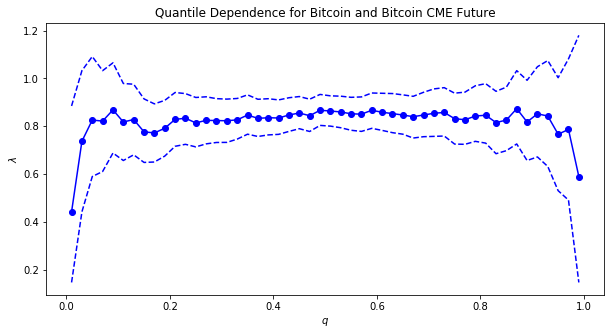

In [10]:
plt.figure(figsize=(10,5))
LQ = np.quantile(np.array(L_arr), 0.05, axis=0)
UQ = np.quantile(np.array(L_arr), 0.95, axis=0)
plt.plot(q_arr, LQ , 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.5, axis=0), 'b-o')
plt.plot(q_arr, UQ, 'b--')
plt.title('Quantile Dependence for Bitcoin and Bitcoin CME Future')
plt.ylabel(r'$\lambda$')
plt.xlabel(r'$q$')
# plt.fill_between(q_arr, LQ, UQ, alpha=.1)


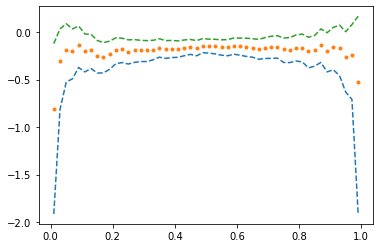

In [11]:
plt.plot(q_arr, np.log(np.quantile(np.array(L_arr), 0.05, axis=0)), '--')
plt.plot(q_arr, np.log(np.quantile(np.array(L_arr), 0.5, axis=0)), '.')
plt.plot(q_arr, np.log(np.quantile(np.array(L_arr), 0.95, axis=0)), '--')

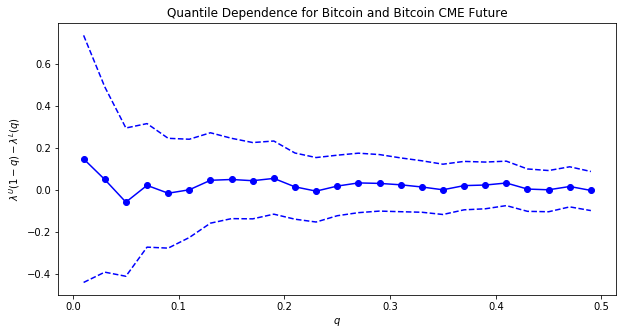

In [12]:
plt.figure(figsize=(10,5))
plt.title('Quantile Dependence for Bitcoin and Bitcoin CME Future')
plt.ylabel(r'$\lambda^U(1-q) - \lambda^L(q)$')
plt.xlabel(r'$q$')

D = np.flip(L_arr[:,25:]) - (L_arr[:,:25]) 
plt.plot(q_arr[:25], np.quantile(D, 0.05, axis=0), 'b--')
plt.plot(q_arr[:25], np.quantile(D, 0.5, axis=0), 'b-o')
plt.plot(q_arr[:25], np.quantile(D, 0.95, axis=0), 'b--')

In [13]:
para_arr = []
C = Gaussian({'rho':0.8}, stats.uniform, stats.uniform)

for i in range(200):
    if i%10==0:
        print(i)
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = u[_id]
    _v = v[_id]
    C.canonical_calibrate(_u,_v)
    para_arr.append(C.rho)


0
Optimization terminated successfully.
         Current function value: -1.001581
         Iterations: 32
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -0.939904
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.979222
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -0.969067
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -0.830999
         Iterations: 31
         Function evaluations: 66
Optimization terminated successfully.
         Current function value: -0.881059
         Iterations: 31
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -0.897158
         Iterations: 31
         Function evaluations: 65
Optimization terminated s

Optimization terminated successfully.
         Current function value: -0.865177
         Iterations: 30
         Function evaluations: 63
60
Optimization terminated successfully.
         Current function value: -0.983625
         Iterations: 31
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -0.990422
         Iterations: 31
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -0.935046
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.908476
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -1.044608
         Iterations: 31
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: -0.936668
         Iterations: 30
         Function evaluations: 63
Optimization terminated 

Optimization terminated successfully.
         Current function value: -0.966194
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.984990
         Iterations: 30
         Function evaluations: 63
120
Optimization terminated successfully.
         Current function value: -0.942810
         Iterations: 30
         Function evaluations: 63
Optimization terminated successfully.
         Current function value: -1.038902
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.897562
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.913030
         Iterations: 30
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -0.989257
         Iterations: 30
         Function evaluations: 63
Optimization terminated

KeyboardInterrupt: 

In [ ]:
plt.boxplot(para_arr)

In [ ]:
para_arr_MM = []
para_arr_MLE = []
para_0 = {'theta':10}
C = Clayton(para_0, stats.uniform, stats.uniform)

for i in range(200):
    if i%10==0:
        print(i)
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = ECDF(brr[_id])(brr[_id])
    _v = ECDF(btc[_id])(btc[_id])
    C.__init__(para_0, C.Law_RS, C.Law_RF)
    C.canonical_calibrate(_u,_v)
    para_arr_MLE.append(C.theta)
    C.mm_calibrate(_u,_v, [0.05,0.1,0.9,0.95])
    para_arr_MM.append(C.theta)
    
para_arr_MM = np.array(para_arr_MM)
para_arr_MLE = np.array(para_arr_MLE)

In [ ]:
# plt.boxplot(para_arr_MM)

tau_MLE = para_arr_MLE/(para_arr_MLE+2)
tau_MM = para_arr_MM/(para_arr_MM+2)

# tau_MLE = (para_arr_MLE-1)/para_arr_MLE
# tau_MM = (para_arr_MM-1)/para_arr_MM
# plt.boxplot([tau_MLE,tau_MM], positions=[0,1])

plt.boxplot([para_arr_MLE,para_arr_MM], positions=[0,1])

In [ ]:
np.mean(para_arr_MLE)/np.std(para_arr_MLE)

In [ ]:
np.mean(para_arr_MM)/np.std(para_arr_MM)

Optimization terminated successfully.
         Current function value: -0.943696
         Iterations: 32
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.008934
         Iterations: 33
         Function evaluations: 68


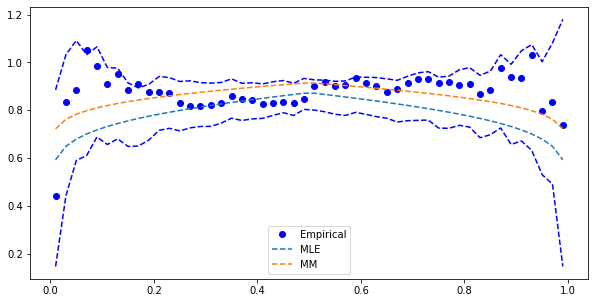

In [14]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Gaussian({'rho':0.8}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gaussian({'rho':0.8}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")

plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')

plt.legend()

Optimization terminated successfully.
         Current function value: -1.084665
         Iterations: 138
         Function evaluations: 257
{'rho': 0.9340699505281371, 'nu': 2.0000000000000075}
Optimization terminated successfully.
         Current function value: 0.002347
         Iterations: 109
         Function evaluations: 201
{'rho': 0.9387028283435905, 'nu': 2.0000000000016938}


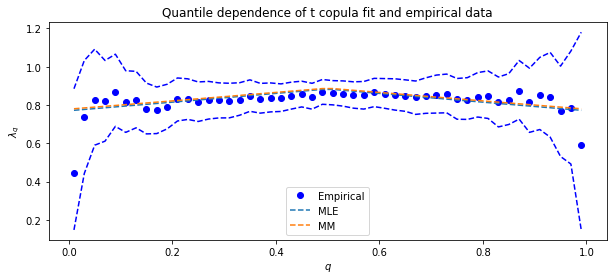

In [23]:
plt.figure(figsize=(10,4))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = t_Copula({'rho':0.8, 'nu':2}, stats.uniform, stats.uniform, nu_lowerbound=2)
C.canonical_calibrate(u,v)
print(C.paras)

L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = t_Copula({'rho':0.8, 'nu':2}, stats.uniform, stats.uniform, nu_lowerbound=2)
C.mm_calibrate(u,v,[0.05,0.3,0.7,0.95])
print(C.paras)

L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda_q$')
plt.title('Quantile dependence of t copula fit and empirical data')


plt.savefig('../latex/_pics/t Copula quantile dependence.png', transparent=True)

Optimization terminated successfully.
         Current function value: -0.999565
         Iterations: 39
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 0.038363
         Iterations: 39
         Function evaluations: 85


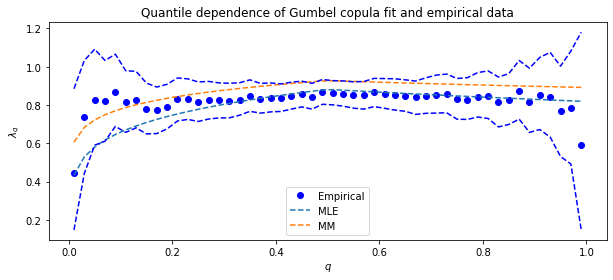

In [22]:
plt.figure(figsize=(10,4))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Gumbel({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gumbel({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda_q$')
plt.title('Quantile dependence of Gumbel copula fit and empirical data')

plt.savefig('../latex/_pics/Gumbel Copula quantile dependence.png', transparent=True)

Optimization terminated successfully.
         Current function value: -0.827703
         Iterations: 40
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 0.095431
         Iterations: 47
         Function evaluations: 105


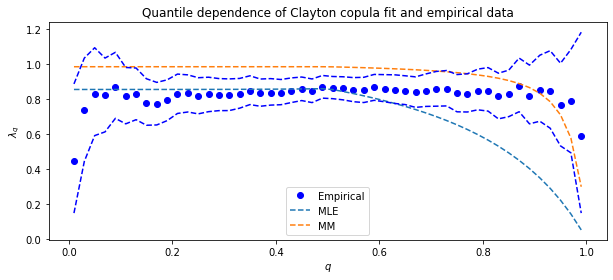

In [24]:
plt.figure(figsize=(10,4))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Clayton({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Clayton({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda_q$')
plt.title('Quantile dependence of Clayton copula fit and empirical data')

plt.savefig('../latex/_pics/Clayton Copula quantile dependence.png', transparent=True)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Frank({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Frank({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Gaussian_Mix_Independent({'rho':0.5, 'p':0.9}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Gaussian_Mix_Independent({'rho':0.5, 'p':0.9}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()